# Code to produce the figures of the manuscript

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import pandas as pd
import seaborn as sns
sys.path.insert(0, os.path.abspath('../../'))
from skmap.data import toy
from skmap.io import process
import importlib
import time
importlib.reload(process)
from tqdm.notebook import tqdm
from scipy.signal import savgol_coeffs
plt.rcParams.update({'font.size': 24})
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression

In [52]:
def get_SWA_weights(att_env, att_seas, season_size, n_imag, exp_noexp):
    conv_mat_row = np.zeros((n_imag))
    base_func = np.zeros((season_size,))
    period_y = season_size/2.0
    slope_y = att_seas/10/period_y
    for i in np.arange(season_size):
        if i <= period_y:
            base_func[i] = -slope_y*i
        else:
            base_func[i] = slope_y*(i-period_y)-att_seas/10
    # Compute the envelop to attenuate temporarly far images
    env_func = np.zeros((n_imag,))
    delta_e = n_imag
    slope_e = att_env/10/delta_e
    for i in np.arange(delta_e):
        env_func[i] = -slope_e*i
    conv_mat_row = np.resize(base_func,n_imag) + env_func
    if exp_noexp:
        conv_mat_row = 10.0**(conv_mat_row)
    else:
        conv_mat_row /= -np.min(conv_mat_row) - 1e-6
        conv_mat_row += 1.
    return conv_mat_row

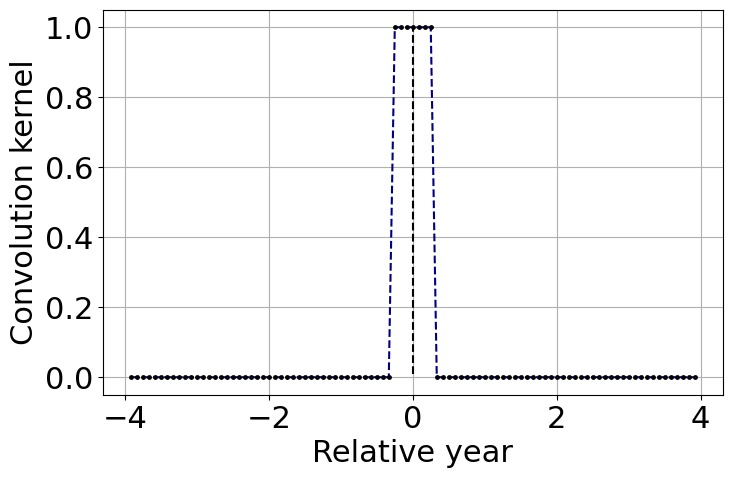

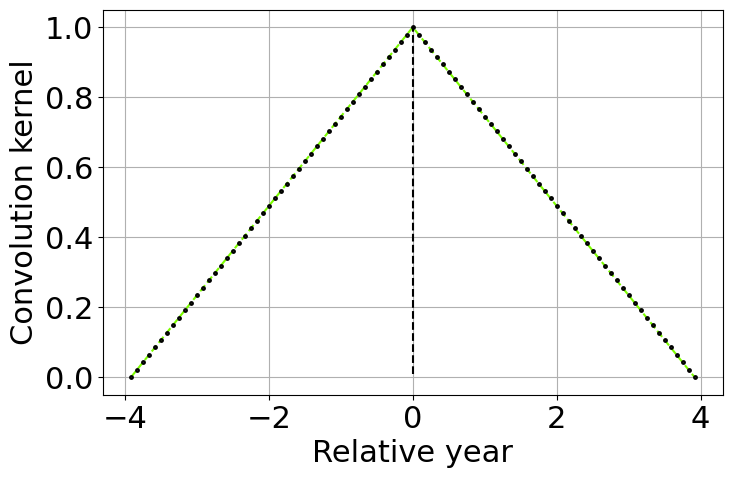

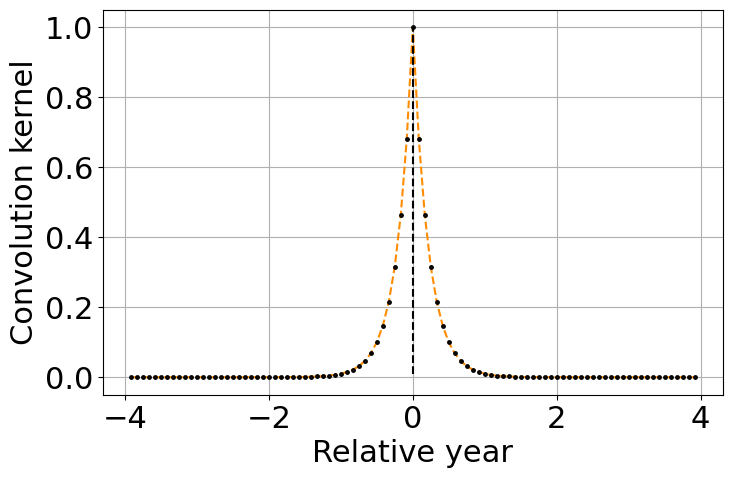

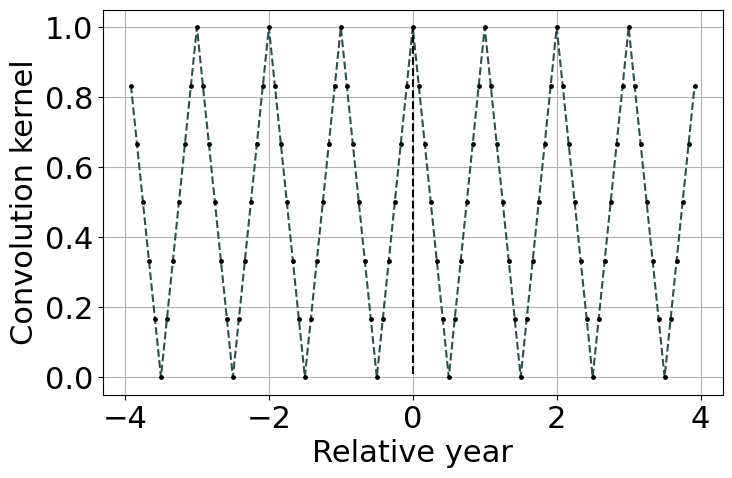

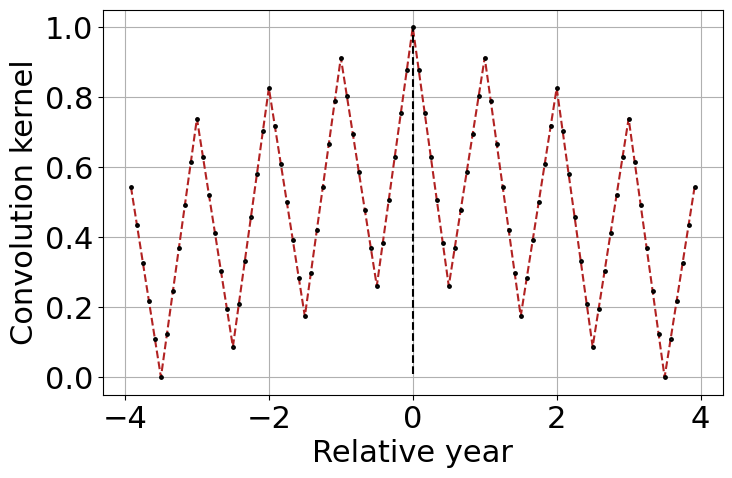

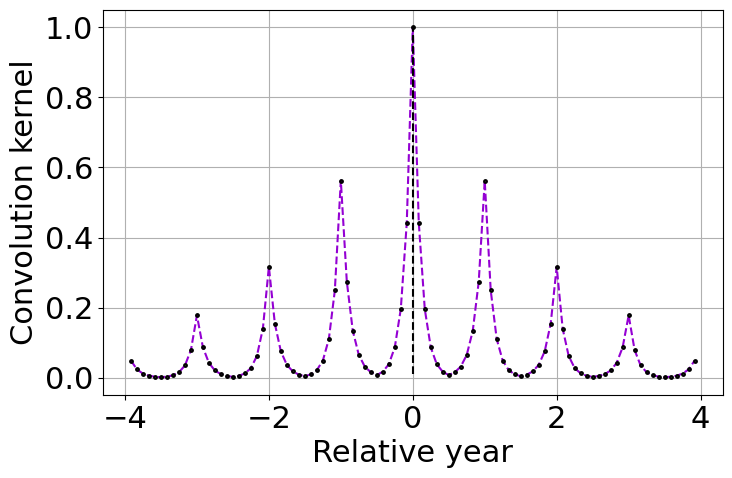

In [54]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib
font_size = 22
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size)    
plt.rc('ytick', labelsize=font_size)   
plt.rc('legend', fontsize=font_size) 
plt.rc('figure', titlesize=font_size)
plt.rcParams.update({'font.size': font_size})
ymin = 0.01
ymax = 1
ms = 3
lw = 1.5
mw = 2


N_s = 48
season_size = 12
x_range = np.arange(-N_s+1, N_s).astype(float)
x_range /= season_size

titles = [ 'Temporal aggregation', 'Approx. lienar interpolation', 'Approx. most recent', 'SWA no envelop', 'SWA no expopnential', 'SWA expopnential']
color_list = ['navy','lawngreen', 'darkorange', 'darkslategray', 'firebrick', 'darkviolet']
kernels = []

N_agg = 7
kernel = np.zeros((len(x_range)))
kernel[N_s-int(np.ceil(N_agg/2)):N_s+int(np.floor(N_agg/2))] = 1.
kernels.append(kernel)

att_env = 80
kernel = np.zeros((len(x_range)))
kernel[N_s-1:] = get_SWA_weights(att_env, 0, season_size, N_s, False)
kernel[0:N_s-1] = get_SWA_weights(att_env, 0, season_size, N_s, False)[1:][::-1]
kernels.append(kernel)

kernel = np.zeros((len(x_range)))
kernel[N_s-1:] = get_SWA_weights(att_env, 0, season_size, N_s, True)
kernel[0:N_s-1] = get_SWA_weights(att_env, 0, season_size, N_s, True)[1:][::-1]
kernels.append(kernel)

att_env = 10
att_seas = 20
kernel = np.zeros((len(x_range)))
kernel[N_s-1:] = get_SWA_weights(0, att_seas, season_size, N_s, False)
kernel[0:N_s-1] = get_SWA_weights(0, att_seas, season_size, N_s, False)[1:][::-1]
kernels.append(kernel)

kernel = np.zeros((len(x_range)))
kernel[N_s-1:] = get_SWA_weights(att_env, att_seas, season_size, N_s, False)
kernel[0:N_s-1] = get_SWA_weights(att_env, att_seas, season_size, N_s, False)[1:][::-1]
kernels.append(kernel)

kernel = np.zeros((len(x_range)))
kernel[N_s-1:] = get_SWA_weights(att_env, att_seas, season_size, N_s, True)
kernel[0:N_s-1] = get_SWA_weights(att_env, att_seas, season_size, N_s, True)[1:][::-1]
kernels.append(kernel)

for i in range(len(titles)):
    plt.figure(figsize=(8,5))
    plt.plot(x_range, kernels[i], '.',  mfc='none', mec='k', markersize=ms, linestyle='--', linewidth=lw, markeredgewidth=mw, color = color_list[i])
    plt.vlines(0, ymin, ymax, colors='k', linestyles='--')

    plt.xlabel('Relative year')
    plt.ylabel('Convolution kernel')
    # plt.title(titles[i], y=1.05,)
    plt.grid(True, which="both", ls="-")
    plt.savefig(f'guidelines_{i+1}.pdf', format='pdf', bbox_inches="tight")
    plt.show()
